# Часть 1 практическая:

# Задание 1.1

В приложении вы найдете 2 таблицы, это кусок базы для «прогнозирования оттока».
В «Таблице 1» содержатся некоторые данные о поведении Клиентов за три месяца
В «Таблице 2» данные об оттоке этих Клиентов в 4-м месяце.
Необходимо из исходных таблиц (см. вкладки «Таблица 1»  и «Таблица 2»  во вложении) получить  таблицу со следующими характеристиками (описание показателей на вкладке «Словарь показателей»): 

- В таблицу должны попасть  клиенты со сроком жизни (CL_AGE) больше 90 дней на март 2016г.

- В таблицу должны попасть только клиенты с ненулевым количеством интернет сессий (ACC_COUNT_INTER)  в марте 2016г.

- Таблица должна иметь следующие показатели по каждому идентификатору клиента: 
 - Возраст клиента в марте 2016 г.
 - Показатели № 4-20 за месяца января-марта 2016 г.  (данные за каждый месяц по каждому показателю отдельно)
 - Суммарное ­значение за три месяца  для показателей № 4, 13, 18 (сумма  рассчитывается по каждому показателю в отдельности)
 - Сумма максимального платежа за три месяца
 - Среднее значение за три месяца для показателей № 9, 10, 12
 - Показатель, характеризующий наличие хотя бы одной аварии за три месяца (1 – аварии были, 0 – не было)
 - Показатель, характеризующий наличие хотя бы одно перехода из добросовестного плательщика в недобросовестного за 3 мес. (1 – был переход, 0 – не было)
 - Показатель – таргет с листа «Таблица 2»

Итоговый результат: написанный скрипт SQL , который  исходную таблицу преобразует  в вышеописанный вид + таблица в excel с результатами запуска скрипта
Для написания и тестирования скрипта можно воспользоваться  СУБД MYSQL, которая доступна по ссылке https://free4.beget.com/phpMyAdmin/index.php

# Решение 

In [1]:
import pandas as pd

In [2]:
Data = pd.read_csv('/home/avikharev/Documents/Task 1.csv')
Data.head()

,ID_CLIENT,CL_AGE,AG_INTER_CNT,ACC_COUNT_INTER,SUM_ACC_COUNT_INTER,ACCIDENTS_FOR_THREE_MONTHS,ACC_TIME_INTER,AG_CALL_EXISTS,AG_FACT_ANTIVIRUS,AG_FACT_SB,...,CONSCIENTIOUS,PAY_SUMM_DISC_OTHER,PAY_SUMM_MONTH,MAX_PAY_SUMM_MONTH,SERV_COUNT,SUM_SERV_COUNT,SERV_INTER_REPEAT,SERV_REQ_CONN,SUM_SERV_COUNT.1,TARGET
0,1242751.0,784.0,7.0,0.0,1.0,1.0,0.00,1.0,1.0,0.0,...,1.0,0.0,1113.00,1113.0,1.0,1.0,0.0,1.0,1.0,1.0
1,1242751.0,784.0,9.0,1.0,1.0,1.0,0.07,NaN,0.0,0.0,...,1.0,0.0,0.00,1113.0,0.0,1.0,0.0,0.0,1.0,1.0
2,1242751.0,784.0,54.0,0.0,1.0,1.0,0.00,NaN,0.0,0.0,...,1.0,0.0,600.00,1113.0,0.0,1.0,0.0,0.0,1.0,1.0
3,1247537.0,1114.0,0.0,0.0,51.0,1.0,0.00,2.0,0.0,0.0,...,0.0,0.0,1547.00,1547.0,2.0,3.0,1.0,0.0,3.0,0.0
4,1247537.0,1114.0,23.0,5.0,51.0,1.0,0.39,2.0,0.0,0.0,...,0.0,0.0,1371.29,1547.0,0.0,3.0,0.0,0.0,3.0,0.0


--============================================--

# Задание 1.2

Ниже представлена таблица о количестве абонентов и статусе их активности через 12 месяцев
Абоненты разделены на сегменты, в зависимости от подключенных ими дополнительных услуг на январь 2018 года

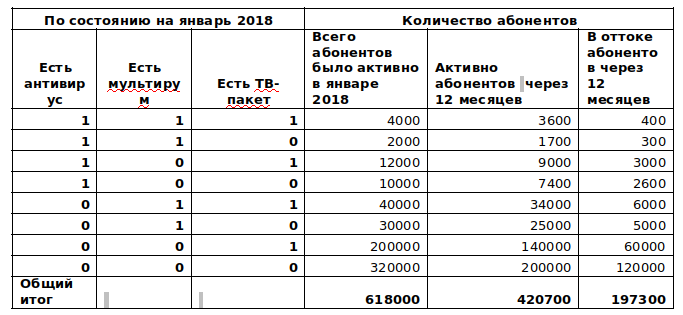

Проанализируйте предоставленные данные и сделайте вывод о влиянии доп. услуг на отток абонентов.  
Приложите excel файл с расчетами

In [6]:
# xlsx = pd.read_excel('/home/avikharev/Documents/Task 2.xlsx')
# print(xlsx)

При анализе предоставленной таблицы можно сделать вывод, что сегмент абонентов с полным пакетом подключенных услуг имеет наименьшую долю оттока.

# Решение 

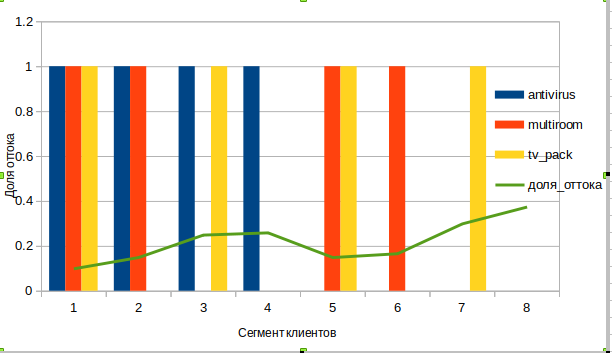

Переменные x1,x2,x3 независимы между собой → Мультиколлинеарность отсутствует.

Регрессор "Есть мультирум" имеет наибольшую корреляцию с целевой переменной (-0.892), возможно, что для уменьшения доли оттока клиентов, им нужно более активно продвигать данную услугу.

Regression

In [11]:
from IPython.display import HTML, display
import tabulate
table = [["Regression Model","Linear"],
         ["R^2:",0.11],
         ["Standard Error:",0.09],
         ["Slope:",-0.058],
         ["Intercept:",0.248]]
display(HTML(tabulate.tabulate(table, tablefmt='html')))

Regression Model,Linear
R^2:,0.11
Standard Error:,0.09
Slope:,-0.058
Intercept:,0.248


Коэфициент детерминации очень мал (0,11),таким образом модель не достаточно хорошо описывает ситуацию, возможно требуется бОльшее количество параметров. 

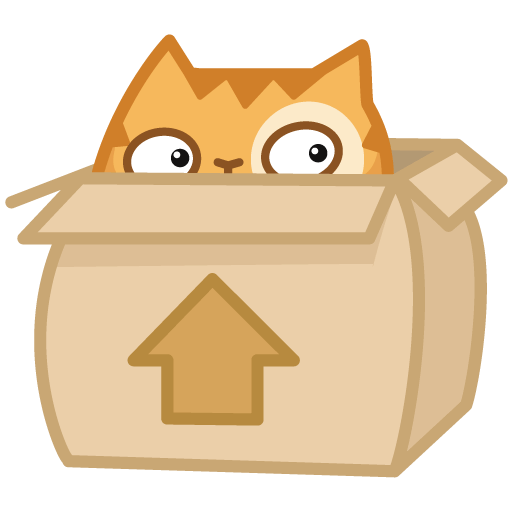

# Часть 2 теоретическая:
Давайте порассуждаем на тему «прогнозирования оттока клиентов»


Кратко опишите:

1. Каким образом стоит подготовить/обработать данные перед началом моделирования?

Для более высокой точности построения математической модели, данные необходимо подвергнуть предварительной обработке (preprocessing). Прежде всего, требуется визуально посмотреть какие данные в конечном итоге у нас собрались, построить графики для соответствующих данных. Затем необходимо понять, нет ли среди данных лишних: все ли величины являются зависимыми перед целевым таргетом. Сделать это можно построив корреляционную матрицу. Таже стоит очистить выборку от отсутствующих данных, либо если выборка слишком мала, то допустимо заменить отсутствующие данные средними по параметру, либо вероятно подходящему исходя из условий. Также все данные необходимо стандартизировать и нормализовать.Для дальнейшей проверки качества модели данные можно разбить на 2 (train, test) или 3 (train,test,validate) выборки, если будет использоваться метод кросс-валидации, чтобы избежать переобучения. Также стоить посмотреть есть ли среди данных категориальные признаки, так как проеобразовав их в количественные с ними будет удобнее и проще работать.

2. Варианты типов моделей, которые могут быть использованы для решения задачи предсказания оттока. А так же результат, который можем получить после применения этих моделей.

Если рассматривать задачу "Прогнозирования оттока клиентов", как задачу бинарной классификации, то можно использовать следующие линейные математические модели, как например: 

* Random Forest (Случайный лес)
* KNeighborsClassifier (Метод к - ближайших соседей)
* LogisticRegression (Логистическая регрессия)
* linear regression (Линейная регрессия, МНК)
* SVC (Метод опорных векторов)

Как правило, исходя из опытных примеров среди математических методов, метод Random Forest оказывается с наибольшим ROC в задачах бинарной классификации.

Также можно использовать нейронные сети прямого распространения типа 
* MLPClassifier
* MLPRegressor

либо рекурентные нейронные сети (RNN), например,
* LSTM

Помимо этих вариантов можно использовать бустинговые модели
* XGboost
* CatBoost 

Еще можно использовать алгоритм машинного обучения от Microsoft на основе обучения дерева решения

* LightGBM

Что касается результатов, которые можем получить относительно всех моделей, то без применения этих моделей на реальных валидных данные, сказать сложно. 
Могу сослаться на [статью](https://habr.com/ru/company/rostelecom/blog/444694/) на хабре от компании Ростелеком, которые уже сталкивались с задачей прогнозирования оттока клиентов и пришли к выводу, что рекурентная нейронаая сеть LSTM на основе распределения Вейбулла с этой задачей справляется наиболее точно, таким образом ребята заняли первое место в номинации «AI в банках» на Чемпионате по ИИ RAIF-Challenge 2017. И действительно, нейронная сеть LSTM используется во многих задачах и очень часто с высокой эффективностью.


Возможно, что данную задачу можно попробовать рассмотреть как временной ряд и попробовать проанализировать моделями ARIMA (SARIMA), но с подобной постановкой задачи и литературой в таком ключе задачи сталкиваться не доводилось.

3.   Какие данные вы бы еще добавили для моделирования? В каких разрезах?

Для моделирования можно выделить на основе существующих данных подгруппы, классифицировав которые можно типизировать каждого клиента индивидуально. 
Учитывая нынешний век интернета и цифровизации, то если иметь доступ к потребляемому трафику человека и разбить трафик на конкретные классы, то это будет сильная база для составления достаточно точного профиля каждого человека. Если же человек не потребляет трафик, то это также будет является его характеристикой.

4. На какие оценки вы бы опирались для проверки качества модели?

При проверки качества модели можно использовать метрику на основе Precision, recall и F-мера с анализом площади под кривой ошибок - ROC - кривой или критерий Джини.

 5. Какие действия с клиентами можно провести на основании результатов моделирования для проактивного предотвращения оттока?

На основании результатов моделирования получится выявить причинность оттока конкретного клиента и явные или неявные признаки конкретных случаев. Для проактивного мониторинга оттока клиентов необходимо держать "руку на пульсе" и поддерживать с контакт. На основании активности клиента можно предсказать его уровень удовлетворенности услугами. Если подходить к контакту с клиентом достаточно креативно, то фидбэк от заинтереснованного клиента обязательно будет.

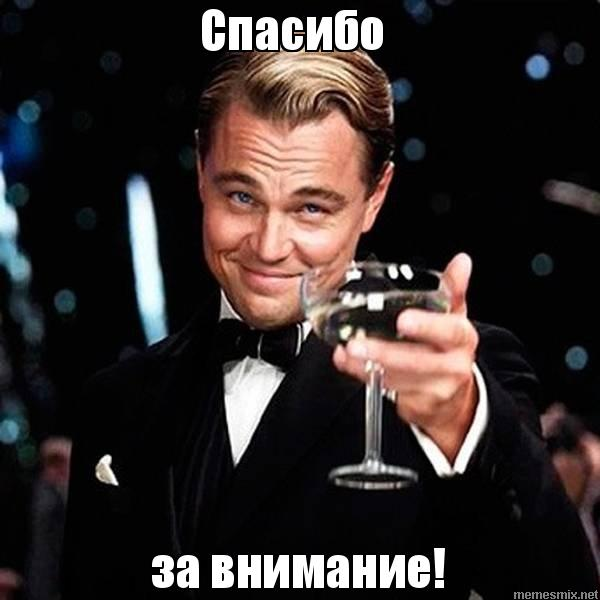